<a href="https://colab.research.google.com/github/MonikSense/Diabetes/blob/main/diabetes6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (100000, 9)
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

✅ Target column detected as: diabetes

📌 Numerical Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level'

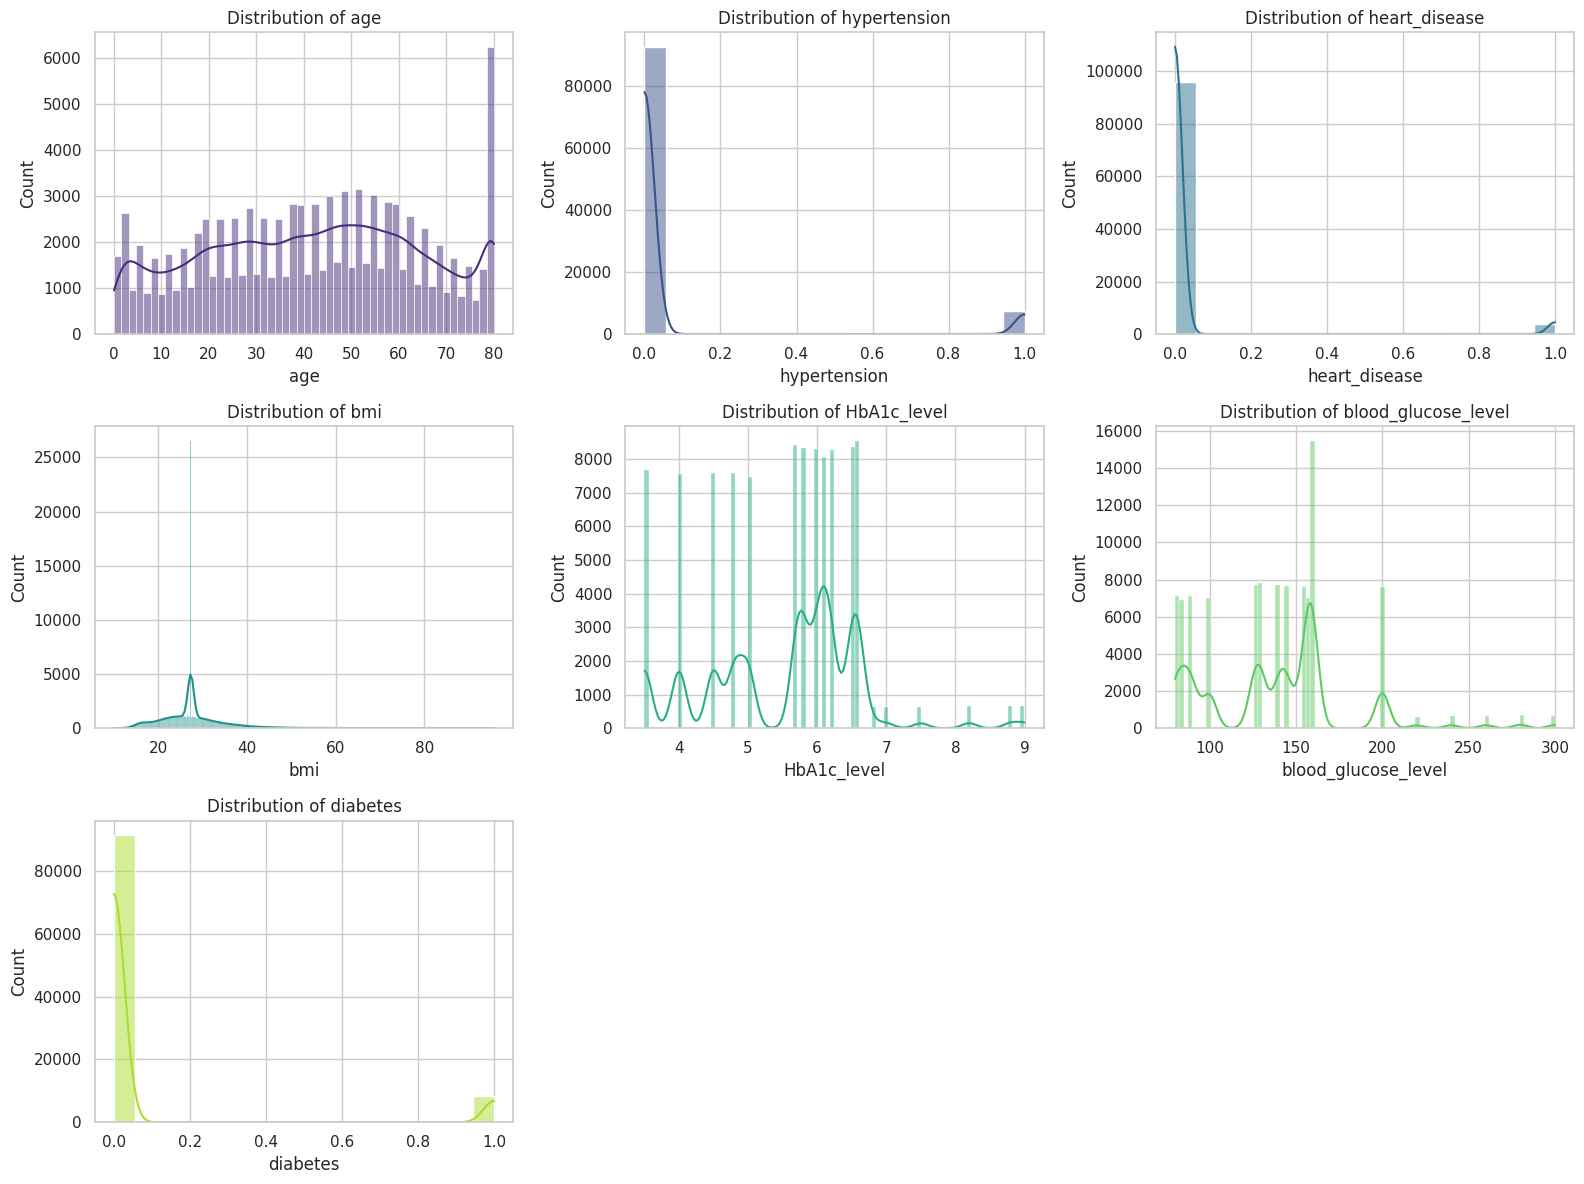

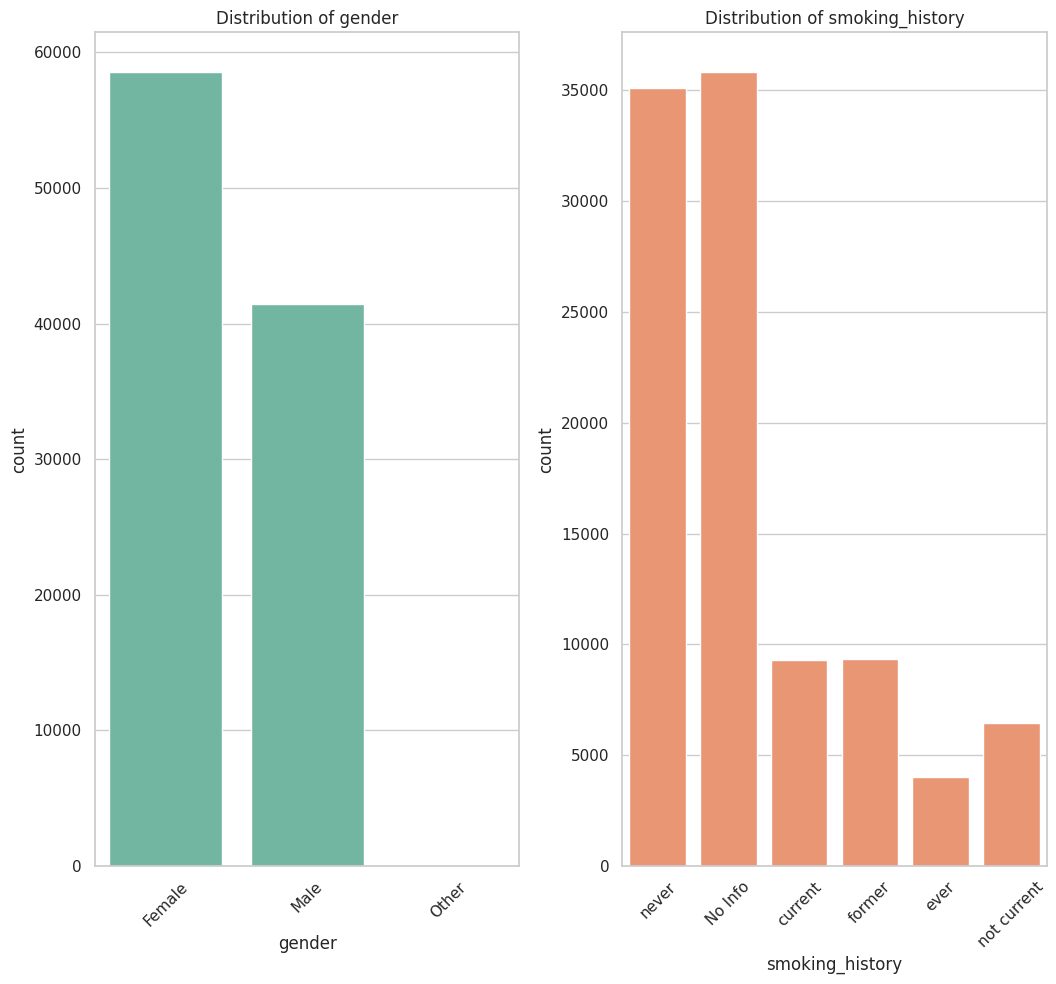

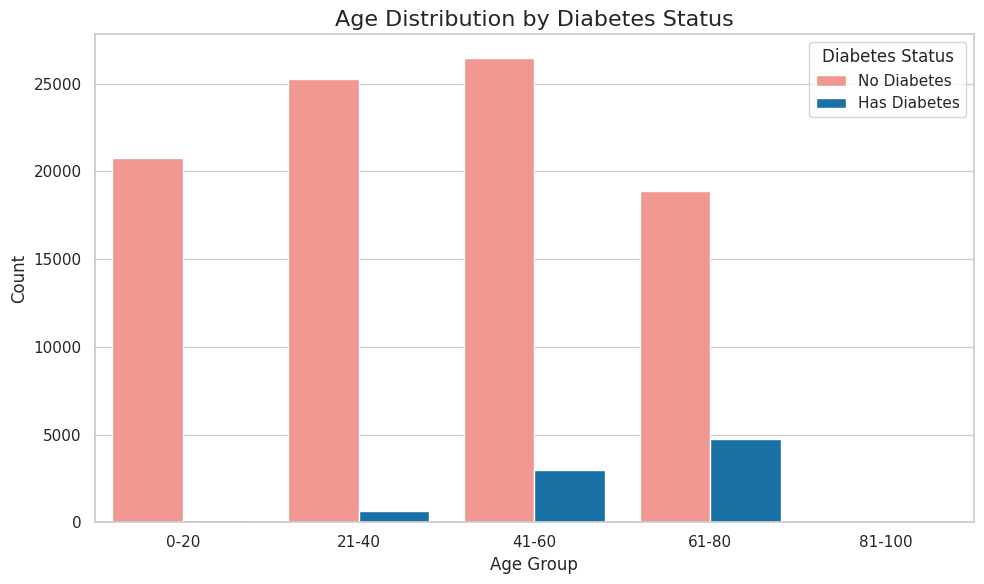

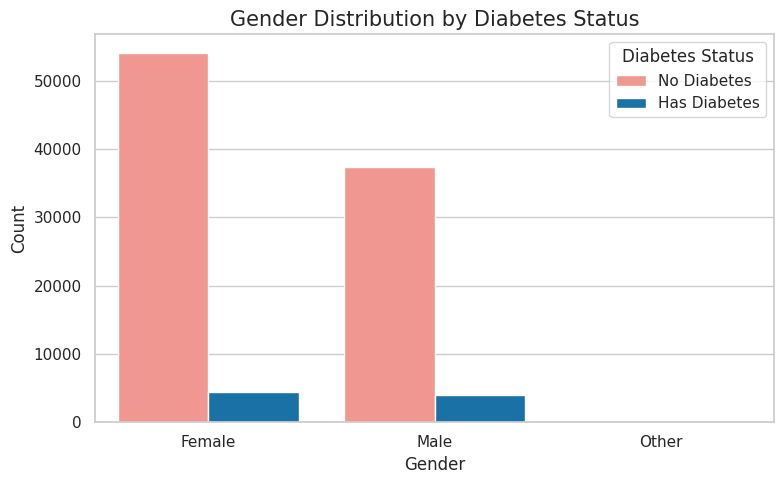

/tmp/ipython-input-3006689148.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


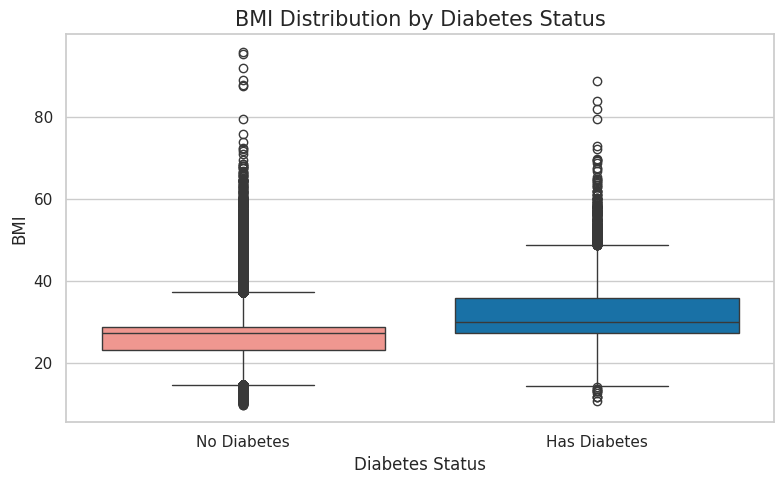

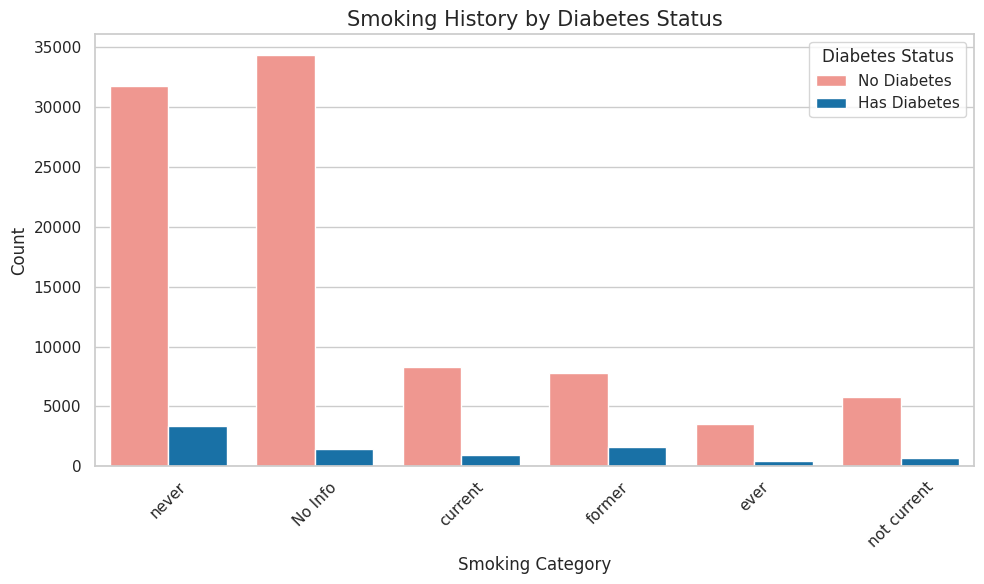

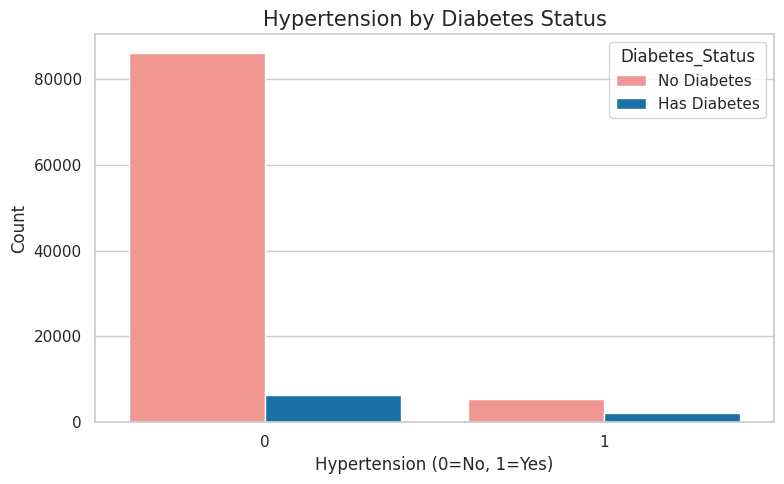

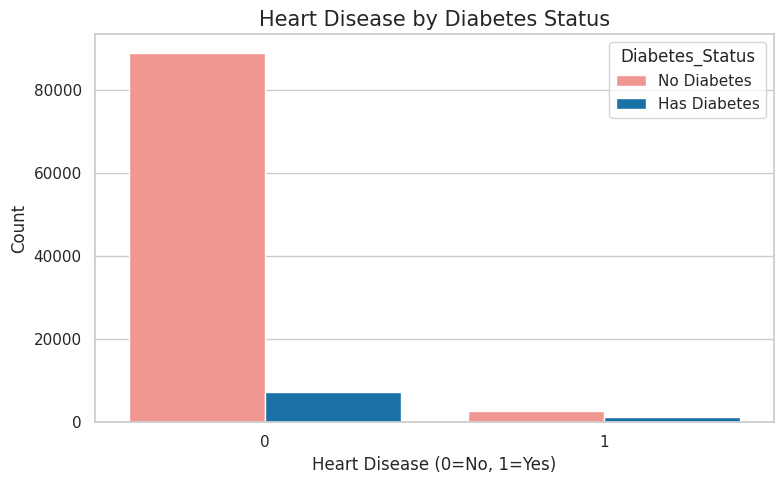

/tmp/ipython-input-3006689148.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


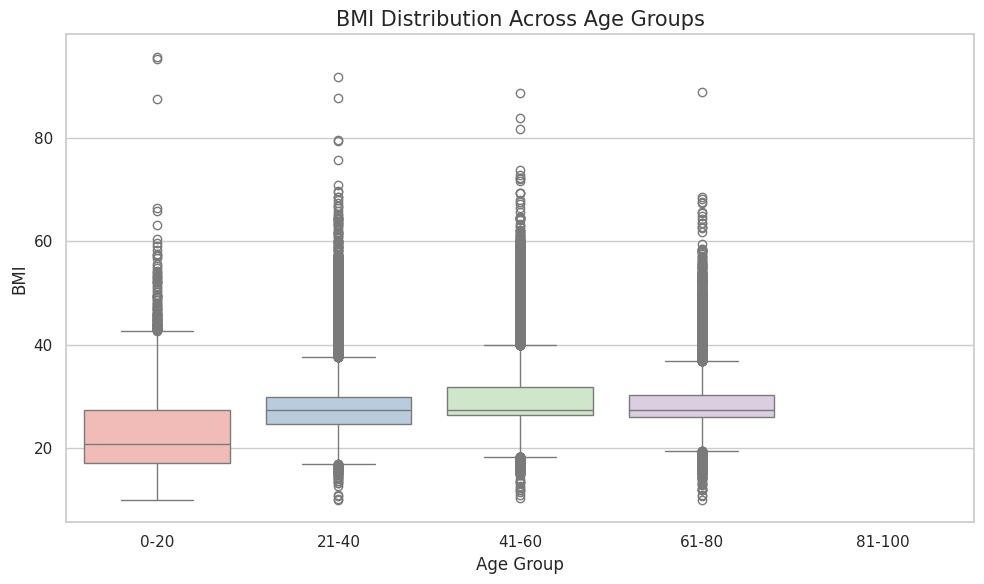

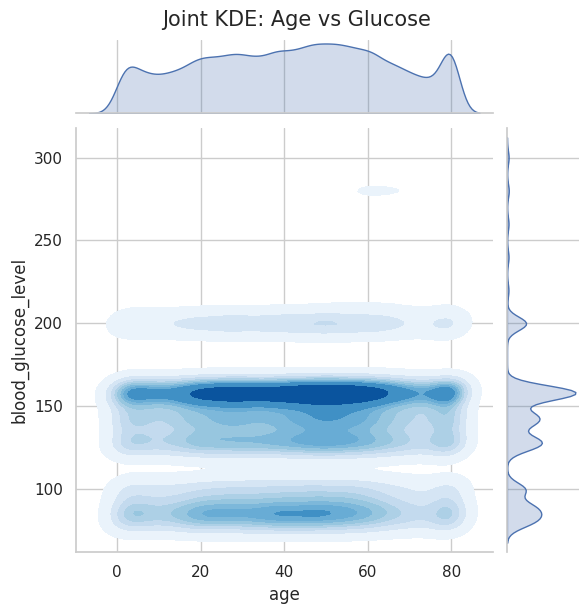

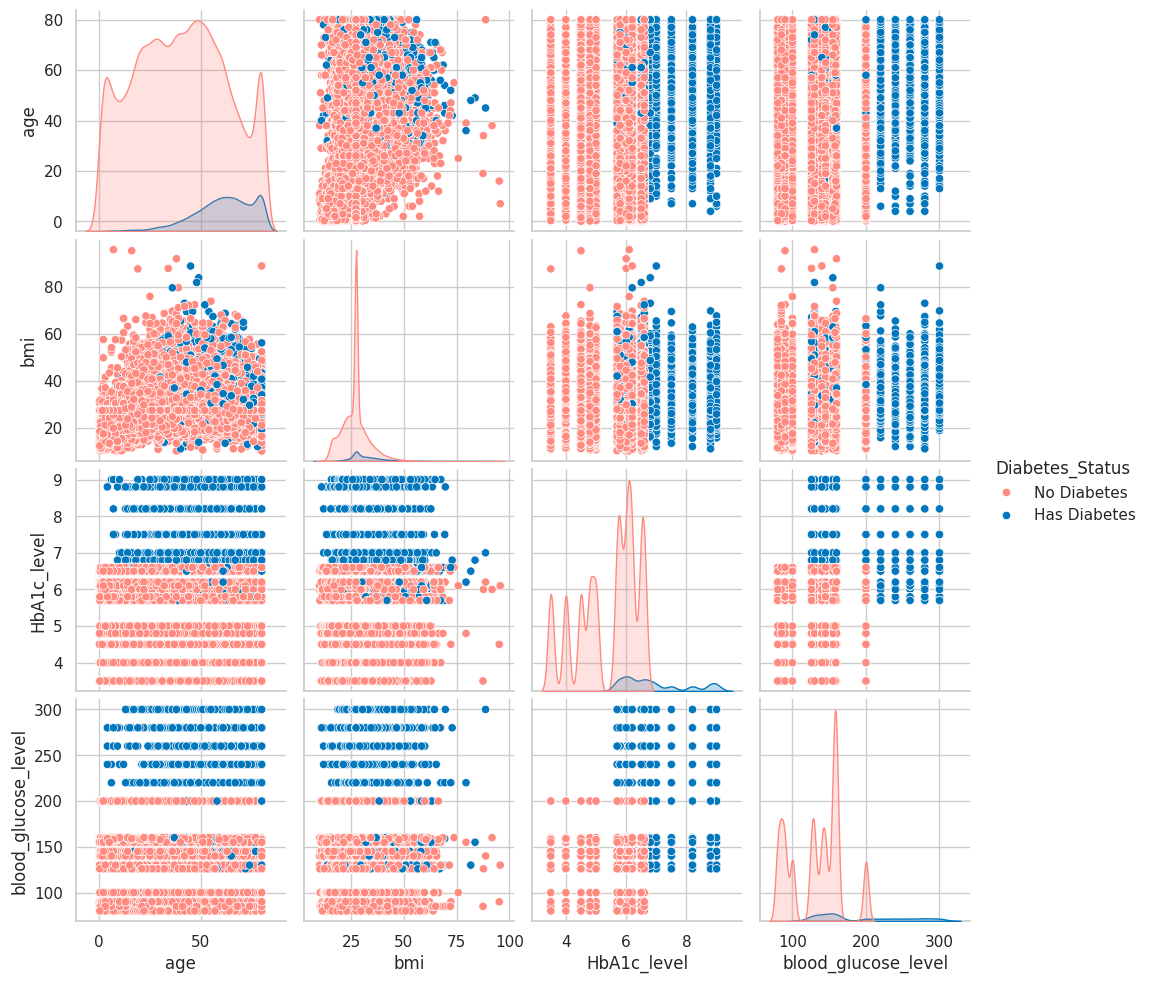

✅ Data Split: Train=60000, Validation=20000, Test=20000

🔹 Training Logistic Regression...
Validation Accuracy: 1.000, AUC: 1.000

🔹 Training Random Forest...
Validation Accuracy: 1.000, AUC: 1.000

🔹 Training XGBoost...
Validation Accuracy: 1.000, AUC: 1.000

🔹 Logistic Regression (Test Set Results)
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[18300     0]
 [    0  1700]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18300
           1       1.00      1.00      1.00      1700

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


🔹 Random Forest (Test Set Results)
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[18300     0]
 [    0  1700]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18300
           1       1.00      1.0

/tmp/ipython-input-3006689148.py:373: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_df.index, y=acc_df['Accuracy'], palette='viridis')


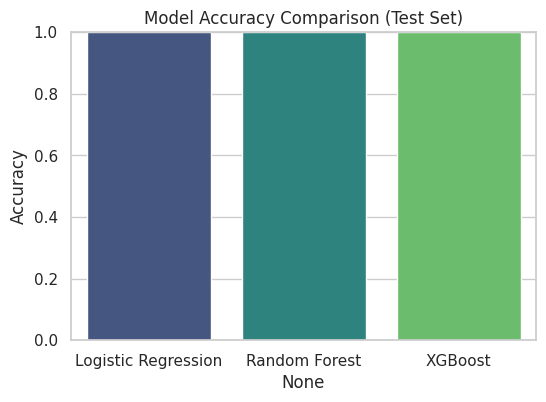

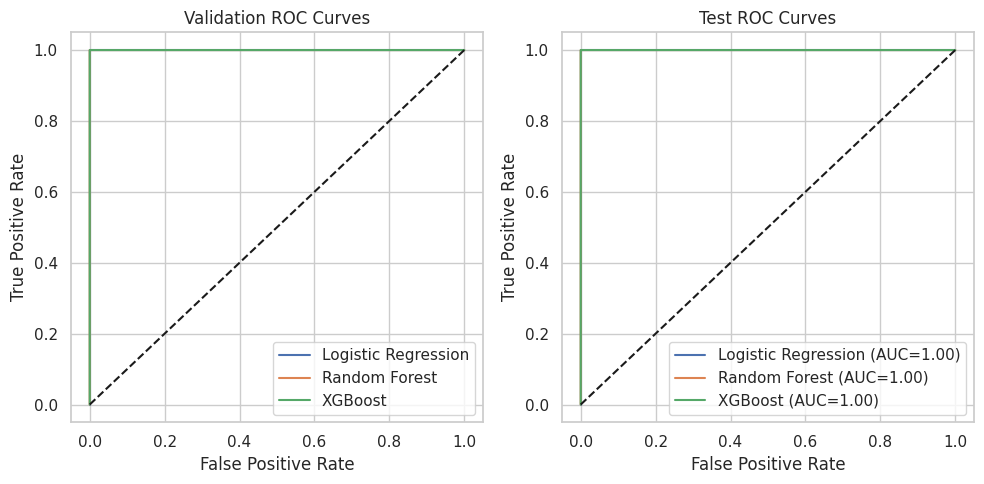

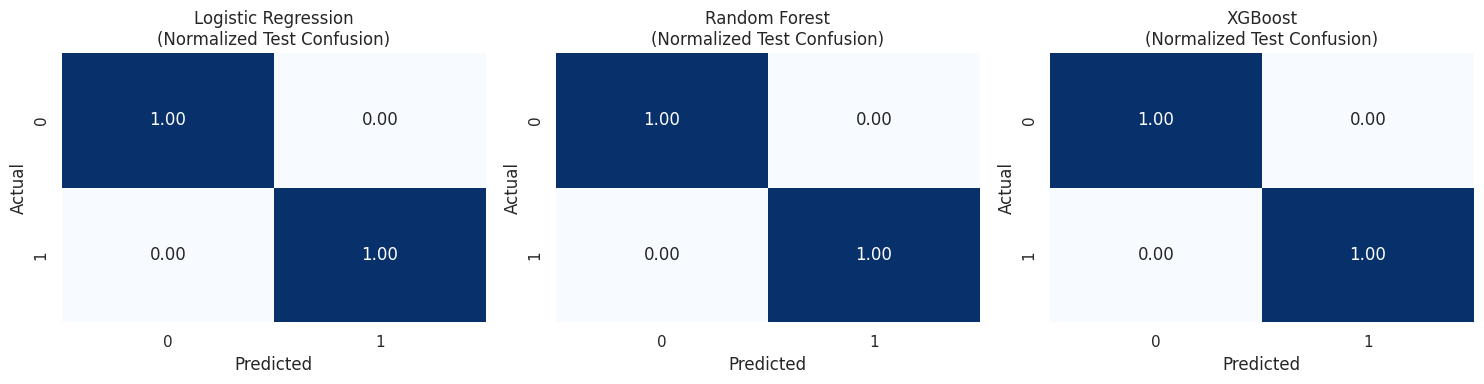

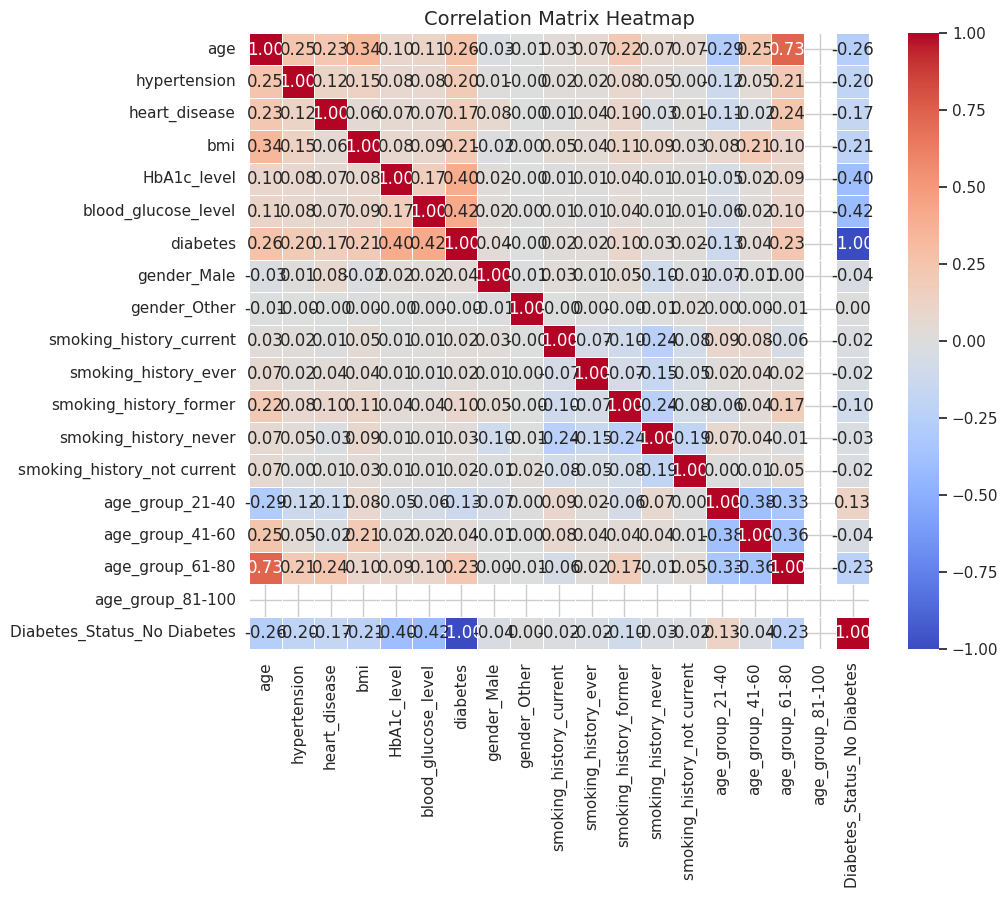

In [6]:
# ============================
# Diabetes Prediction using ML (Train/Validation/Test Split + ROC Curves)
# ============================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 2️⃣ Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/MonikSense/Diabetes/refs/heads/main/diabetes_prediction_dataset.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 3️⃣ Detect target column
target_col = "diabetes" if "diabetes" in df.columns else None
if target_col is None:
    raise ValueError("⚠️ Please ensure the dataset has a 'diabetes' column as the target variable.")

print(f"\n✅ Target column detected as: {target_col}")



# ============================
# 3A️⃣ Dataset Population Distribution for All Attributes
# ============================

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("\n📌 Numerical Columns:", list(num_cols))
print("📌 Categorical Columns:", list(cat_cols))

import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice plotting style
sns.set_theme(style="whitegrid")

# ---- Numerical Feature Distribution ----
plt.figure(figsize=(16, 12))
colors = sns.color_palette("viridis", len(num_cols))  # different color for each plot

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, color=colors[i-1])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# ---- Categorical Feature Distribution ----
plt.figure(figsize=(16, 10))
colors_cat = sns.color_palette("Set2", len(cat_cols))  # distinct colors

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)
    sns.countplot(x=df[col], color=colors_cat[i-1])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# 🎨 Age Distribution by Diabetes Status (Fig. 4.1)
# ============================

# Create Age Groups
bins = [0, 20, 40, 60, 80, 100]
labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)

# Map diabetes label for better visualization
df["Diabetes_Status"] = df[target_col].map({0: "No Diabetes", 1: "Has Diabetes"})

plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x="age_group",
    hue="Diabetes_Status",
    palette=["#ff8a80", "#0277bd"]
)

plt.title("Age Distribution by Diabetes Status", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.legend(title="Diabetes Status")
plt.tight_layout()
plt.show()


# ============================
# Gender Distribution by Diabetes Status
# ============================

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="gender",
    hue=df[target_col].map({0: "No Diabetes", 1: "Has Diabetes"}),
    palette=["#ff8a80", "#0277bd"]
)

plt.title("Gender Distribution by Diabetes Status", fontsize=15)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Has Diabetes"])
plt.tight_layout()
plt.show()


# ============================
# BMI Distribution by Diabetes Status
# ============================

df["Diabetes_Status"] = df[target_col].map({0: "No Diabetes", 1: "Has Diabetes"})

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Diabetes_Status",
    y="bmi",
    palette=["#ff8a80", "#0277bd"]
)

plt.title("BMI Distribution by Diabetes Status", fontsize=15)
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


# ============================
# Smoking Status Distribution by Diabetes Status
# ============================

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="smoking_history",
    hue=df[target_col].map({0: "No Diabetes", 1: "Has Diabetes"}),
    palette=["#ff8a80", "#0277bd"]
)

plt.title("Smoking History by Diabetes Status", fontsize=15)
plt.xlabel("Smoking Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Has Diabetes"])
plt.tight_layout()
plt.show()


# ==========================================================
# 6️⃣ Hypertension Distribution by Diabetes Status
# ==========================================================

if "hypertension" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df,
        x="hypertension",
        hue="Diabetes_Status",
        palette=["#ff8a80", "#0277bd"]
    )
    plt.title("Hypertension by Diabetes Status", fontsize=15)
    plt.xlabel("Hypertension (0=No, 1=Yes)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# ==========================================================
# 7️⃣ Heart Disease Distribution by Diabetes Status
# ==========================================================

if "heart_disease" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df,
        x="heart_disease",
        hue="Diabetes_Status",
        palette=["#ff8a80", "#0277bd"]
    )
    plt.title("Heart Disease by Diabetes Status", fontsize=15)
    plt.xlabel("Heart Disease (0=No, 1=Yes)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ==========================================================
# 8️⃣ BMI Distribution Across Age Groups
# ==========================================================

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="age_group",
    y="bmi",
    palette="Pastel1"
)
plt.title("BMI Distribution Across Age Groups", fontsize=15)
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


# ==========================================================
# 9️⃣ KDE Joint Distribution of Age and Glucose
# ==========================================================

sns.jointplot(
    data=df,
    x="age",
    y="blood_glucose_level",
    kind="kde",
    fill=True,
    cmap="Blues"
)
plt.suptitle("Joint KDE: Age vs Glucose", y=1.02, fontsize=15)
plt.show()



# ==========================================================
# 🔟 Pairplot of Key Predictors
# ==========================================================

cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level", "Diabetes_Status"]

sns.pairplot(
    df[cols],
    hue="Diabetes_Status",
    diag_kind="kde",
    palette=["#ff8a80", "#0277bd"]
)
plt.show()






# 4️⃣ Define Features and Target
X = df.drop(columns=[target_col])
y = df[target_col]

# 5️⃣ Handle Missing Values
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    X[col] = X[col].fillna(X[col].median())
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# 6️⃣ Encode categorical variables
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 7️⃣ Split Data → Train / Validation / Test
# First split into train (60%) + temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
# Then split temp into validation (20%) + test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"✅ Data Split: Train={len(X_train)}, Validation={len(X_val)}, Test={len(X_test)}")

# 8️⃣ Feature Scaling (for LR and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 9️⃣ Model Definitions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', C=1.0),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        random_state=42,
        eval_metric='auc'
    )
}

results = {}

# 🔟 Train and Validate Models
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Use scaled data for LR and XGB
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_val_prob = model.predict_proba(X_val_scaled)[:, 1]

    # Validation Metrics
    val_acc = accuracy_score(y_val, y_val_pred)
    val_auc = roc_auc_score(y_val, y_val_prob)
    print(f"Validation Accuracy: {val_acc:.3f}, AUC: {val_auc:.3f}")

# 11️⃣ Test Evaluation and ROC Storage
roc_data_val, roc_data_test = {}, {}

for name, model in models.items():
    if name == "Random Forest":
        y_val_prob = model.predict_proba(X_val)[:, 1]
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_val_prob = model.predict_proba(X_val_scaled)[:, 1]
        y_test_pred = model.predict(X_test_scaled)
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_prob)
    cm = confusion_matrix(y_test, y_test_pred)
    results[name] = {"accuracy": acc, "auc": auc, "confusion": cm}

    print(f"\n🔹 {name} (Test Set Results)")
    print("Accuracy:", round(acc, 3))
    print("AUC:", round(auc, 3))
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Save ROC data
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    roc_data_val[name] = (fpr_val, tpr_val)
    roc_data_test[name] = (fpr_test, tpr_test)

# 12️⃣ Compare Accuracy (Test Set)
acc_df = pd.DataFrame({m: results[m]["accuracy"] for m in results}, index=["Accuracy"]).T
acc_df.sort_values(by="Accuracy", ascending=False, inplace=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=acc_df.index, y=acc_df['Accuracy'], palette='viridis')
plt.title("Model Accuracy Comparison (Test Set)")
plt.ylim(0, 1)
plt.show()

# 13️⃣ ROC Curves (Validation + Test)
plt.figure(figsize=(10, 5))

# Validation ROC
plt.subplot(1, 2, 1)
for name, (fpr, tpr) in roc_data_val.items():
    plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Validation ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Test ROC
plt.subplot(1, 2, 2)
for name, (fpr, tpr) in roc_data_test.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={results[name]['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Test ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

# 14️⃣ Normalized Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, res) in zip(axes, results.items()):
    cm = res["confusion"]
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"{name}\n(Normalized Test Confusion)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 15️⃣ Correlation Heatmap
df_encoded = pd.get_dummies(df, drop_first=True)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()
